In [ ]:
import plotly.express as px

df = df.copy()
df['Theta_Bin'] = pd.cut(df['Theta'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])
df['Ratio_Bin'] = pd.cut(df['Sigma_Ratio'], bins=[0, 0.1, 0.33, 0.67, 1], labels=['very low', 'low', 'mid', 'high'])

# fig = px.scatter_3d(df, 
#                     x='Strain Rate x', y='Strain Rate y', z='Strain Rate xy',
#                     color='Theta', symbol='Ratio_Bin',
#                     size_max=3, opacity=0.5, color_continuous_scale='Rainbow')
fig = px.scatter_3d(df, 
                    x='Strain Rate x', y='Strain Rate y', z='Strain Rate xy',
                    color='Theta_Bin',
                    size_max=3, opacity=0.5, color_continuous_scale='Rainbow')
fig.update_layout(title=f"Theta at different strains", coloraxis_colorbar=dict(x=-0.1))
fig.write_html("interactive_theta.html")
fig.show()



In [ ]:
df = df.copy()
df['Ratio_Bin'] = pd.cut(df['Sigma_Ratio'], bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], labels=['0s', '.1s', '.2s', '.3s', '.4s', '.5s', '.6s', '.7s', '.8s', '.9s'])

# fig = px.scatter_3d(df, 
#                     x='Strain Rate x', y='Strain Rate y', z='Strain Rate xy',
#                     color='Theta', symbol='Ratio_Bin',
#                     size_max=3, opacity=0.5, color_continuous_scale='Rainbow')
fig = px.scatter_3d(df, 
                    x='Strain Rate x', y='Strain Rate y', z='Strain Rate xy',
                    color='Ratio_Bin',
                    size_max=3, opacity=0.5, color_continuous_scale='Rainbow')
fig.update_layout(title=f"Stress Ratio at different strains", coloraxis_colorbar=dict(x=-0.1))
fig.write_html("interactive_ratio.html")
fig.show()

In [ ]:
df = df_theta.copy()
df['Ratio_Bin'] = pd.cut(df['Sigma_Ratio'], bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], labels=['0s', '.1s', '.2s', '.3s', '.4s', '.5s', '.6s', '.7s', '.8s', '.9s'])

fig = px.scatter_3d(df, 
                    x='Strain Rate x', y='Strain Rate y', z='Strain Rate xy',
                    color='Ratio_Bin',
                    size_max=3, opacity=0.5, color_continuous_scale='Rainbow')

fig.update_layout(title=f"Stress Ratios at theta=30", coloraxis_colorbar=dict(x=-0.1))
fig.show()

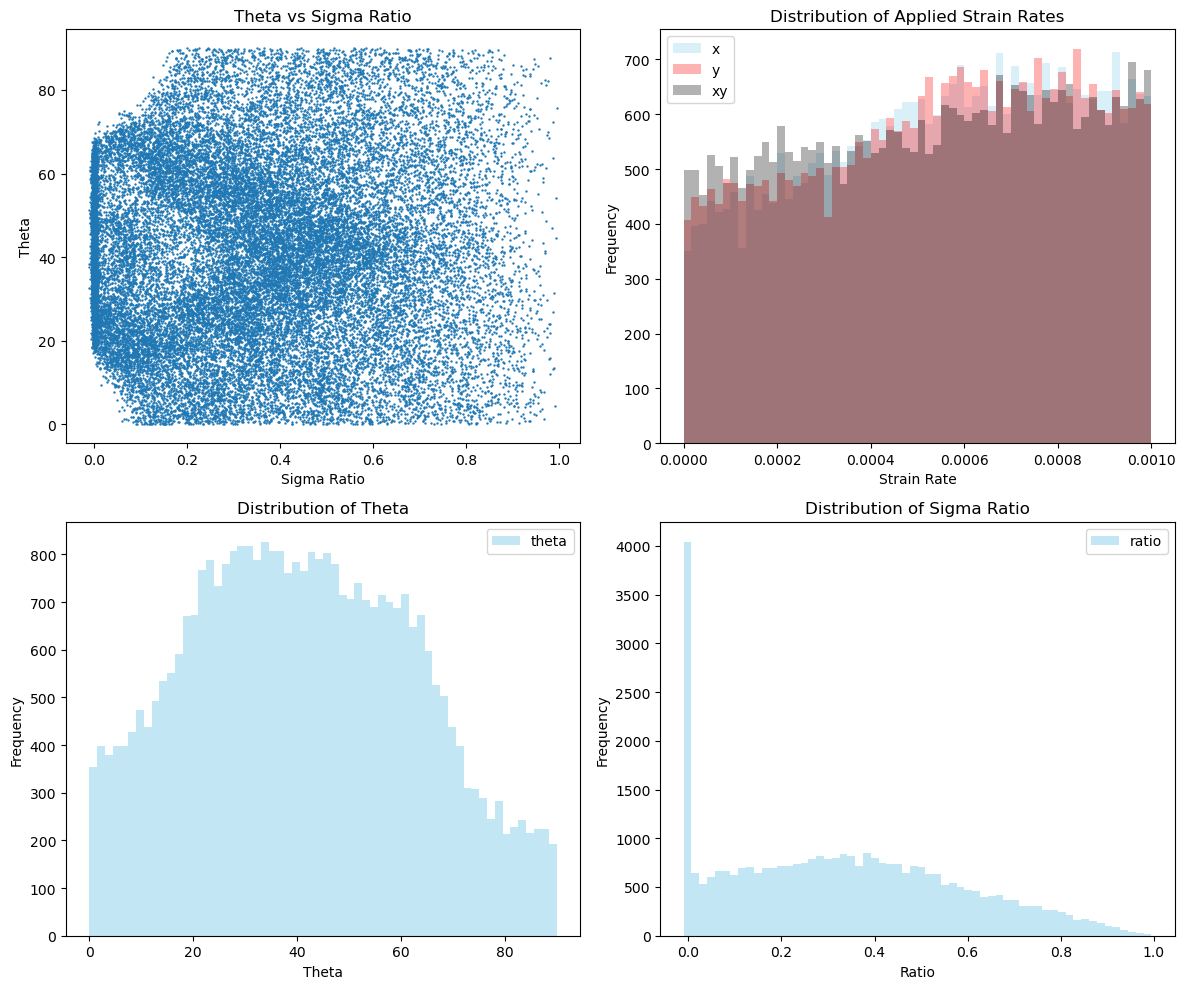

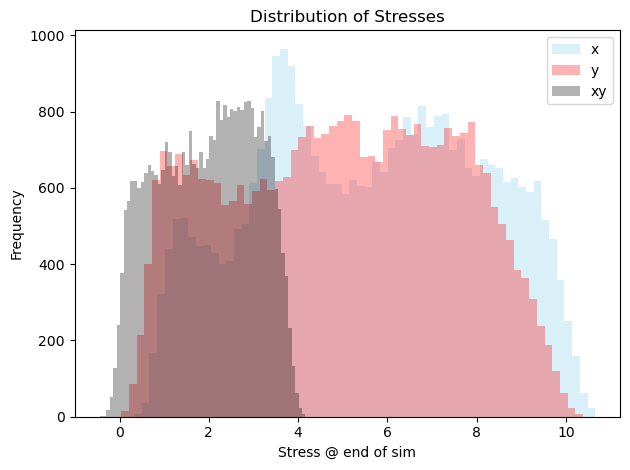

In [30]:
import pandas as pd
import local_config
import matplotlib.pyplot as plt
import numpy as np

# df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv')
df = pd.read_csv("filtered.csv")

df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

df.to_csv("filtered.csv")

# Create a figure and 2x2 grid of axes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# First plot: thetas vs sigma ratio scatter
axs[0, 0].scatter(df["Sigma_Ratio"], df["Theta"], s=0.5)
axs[0, 0].set_xlabel("Sigma Ratio")
axs[0, 0].set_ylabel("Theta")
axs[0, 0].set_title("Theta vs Sigma Ratio")

# Second plot: strain rate histogram
axs[0, 1].hist(df["Strain Rate x"], bins=60, color='skyblue', alpha=0.3, label='x')
axs[0, 1].hist(df["Strain Rate y"], bins=60, color='red', alpha=0.3, label='y')
axs[0, 1].hist(df["Strain Rate xy"], bins=60, color='black', alpha=0.3, label='xy')
axs[0, 1].set_xlabel("Strain Rate")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].legend()
axs[0, 1].set_title("Distribution of Applied Strain Rates")

# Third plot: thetas histogram
axs[1, 0].hist(df["Theta"], bins=60, color='skyblue', alpha=0.5, label='theta')
axs[1, 0].set_xlabel("Theta")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()
axs[1, 0].set_title("Distribution of Theta")

# Fourth plot: ratios histogram
axs[1, 1].hist(df["Sigma_Ratio"], bins=60, color='skyblue', alpha=0.5, label='ratio')
axs[1, 1].set_xlabel("Ratio")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].legend()
axs[1, 1].set_title("Distribution of Sigma Ratio")

# Adjust layout
plt.tight_layout()
plt.show()
plt.clf()


plt.hist(df["Sigma_x"], bins=60, color='skyblue', alpha=0.3, label='x')
plt.hist(df["Sigma_y"], bins=60, color='red', alpha=0.3, label='y')
plt.hist(df["Sigma_xy"], bins=60, color='black', alpha=0.3, label='xy')
plt.xlabel("Stress @ end of sim")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Stresses")
plt.tight_layout()
plt.show()

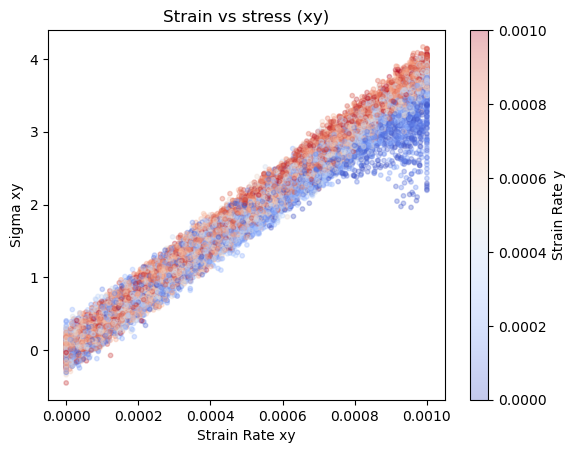

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

# df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations.csv')
df = pd.read_csv("filtered.csv")

targ = 'xy'
colorby = 'y'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.3, s=10, c=df[f"Strain Rate {colorby}"], cmap='coolwarm')
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.colorbar(label=f"Strain Rate {colorby}")  # add color legend
plt.show()

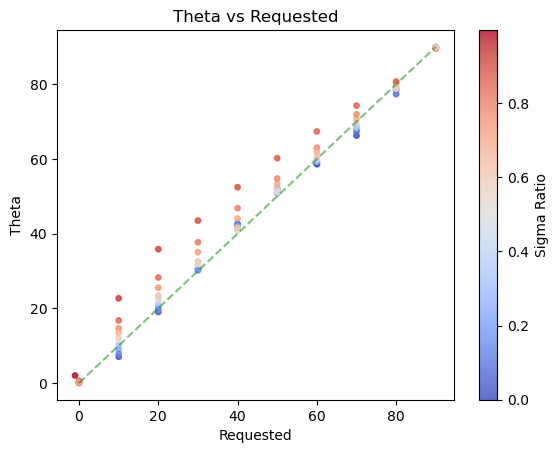

In [5]:
import pandas as pd
import local_config
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f'{local_config.DATA_DIR}/rotation_tests/all_simulations.csv')
# df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

# def compute_ratio_theta(row):
#     matrix = np.array([
#         [row['Strength x'], row['Strength xy'], row['Strength xz']],
#         [row['Strength xy'], row['Strength y'], row['Strength yz']],
#         [row['Strength xz'], row['Strength yz'], row['Strength z']]
#     ])
    
#     vals, vecs = np.linalg.eigh(matrix)
#     vals = vals[::-1]
#     vecs = vecs[:, ::-1]
    
#     ratio = vals[1] / vals[0]
#     theta_deg = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0])) % 180
#     theta = min(theta_deg, 180 - theta_deg)
    
#     return pd.Series([theta], index=['Theta'])

# # Apply to DataFrame
# df[['Theta']] = df.apply(compute_ratio_theta, axis=1)
# df.to_csv(f'{local_config.DATA_DIR}/rotation_tests/all_simulations.csv', index=False)

plt.scatter(df[f"Theta Requested"], df[f"Theta"], c=df[f"Strength_2"] / df["Strength_1"], alpha=0.8, s=15, cmap='coolwarm')
plt.colorbar(label=f"Sigma Ratio")  # add color legend
plt.plot([0, 90], [0, 90], '--', alpha=0.5, c='green')

plt.xlabel(f"Requested")
plt.ylabel(f"Theta")
plt.title(f"Theta vs Requested")
plt.show()

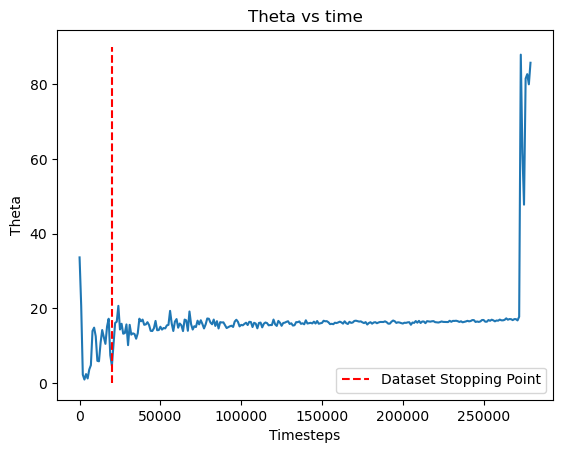

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/rotation_tests/sim00018.csv')
df['Theta'] = df['Theta'].apply(lambda x: min(x, 180 - x))  # keep thetas in bounds

plt.plot(df["Timestep"], df["Theta"])
plt.plot([20000, 20000], [0, 90], '--', color='red', label="Dataset Stopping Point")
plt.title("Theta vs time - Fracture simulation")
plt.xlabel("Timesteps")
plt.ylabel("Theta")
plt.legend()
plt.show()